In [191]:
import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

In [192]:
url="https://data.cityofnewyork.us/resource/rc75-m7u3.json"
covid = requests.get(url)
covid = covid.json()
covid_data=pd.DataFrame(covid) 

covid_data.head()


,date_of_interest,case_count,hospitalized_count,death_count
0,2020-02-29T00:00:00.000,1,11,0
1,2020-03-01T00:00:00.000,0,4,0
2,2020-03-02T00:00:00.000,0,21,0
3,2020-03-03T00:00:00.000,2,20,0
4,2020-03-04T00:00:00.000,5,22,0


In [193]:
covid_data[['Date','Time']] = covid_data["date_of_interest"].str.split("T",expand=True) 

covid_data.head()


,date_of_interest,case_count,hospitalized_count,death_count,Date,Time
0,2020-02-29T00:00:00.000,1,11,0,2020-02-29,00:00:00.000
1,2020-03-01T00:00:00.000,0,4,0,2020-03-01,00:00:00.000
2,2020-03-02T00:00:00.000,0,21,0,2020-03-02,00:00:00.000
3,2020-03-03T00:00:00.000,2,20,0,2020-03-03,00:00:00.000
4,2020-03-04T00:00:00.000,5,22,0,2020-03-04,00:00:00.000


In [194]:
covid_data=covid_data.drop(columns=['date_of_interest', 'Time'], axis=1)
clean_covid.head()


,case_count,hospitalized_count,death_count,Date
0,1,11,0,2020-02-29
1,0,4,0,2020-03-01
2,0,21,0,2020-03-02
3,2,20,0,2020-03-03
4,5,22,0,2020-03-04


In [195]:
clean_covid[['Year','Mounth',"Day"]] = clean_covid["Date"].str.split("-",expand=True) 
clean_covid.head()

,case_count,hospitalized_count,death_count,Date,Year,Mounth,Day
0,1,11,0,2020-02-29,2020,02,29
1,0,4,0,2020-03-01,2020,03,01
2,0,21,0,2020-03-02,2020,03,02
3,2,20,0,2020-03-03,2020,03,03
4,5,22,0,2020-03-04,2020,03,04


In [196]:
final_covid=clean_covid.drop(columns=['Date'], axis=1)
final_covid

,case_count,hospitalized_count,death_count,Year,Mounth,Day
0,1,11,0,2020,02,29
1,0,4,0,2020,03,01
2,0,21,0,2020,03,02
3,2,20,0,2020,03,03
4,5,22,0,2020,03,04
...,...,...,...,...,...,...
202,251,23,4,2020,09,18
203,116,18,1,2020,09,19
204,100,9,0,2020,09,20
205,61,0,1,2020,09,21


In [231]:
march_covid_data = final_covid.loc[(clean_covid["Mounth"] == "03"), :]
march_covid_data.head()

,case_count,hospitalized_count,death_count,Year,Mounth,Day
1,0,4,0,2020,03,01
2,0,21,0,2020,03,02
3,2,20,0,2020,03,03
4,5,22,0,2020,03,04
5,3,20,0,2020,03,05


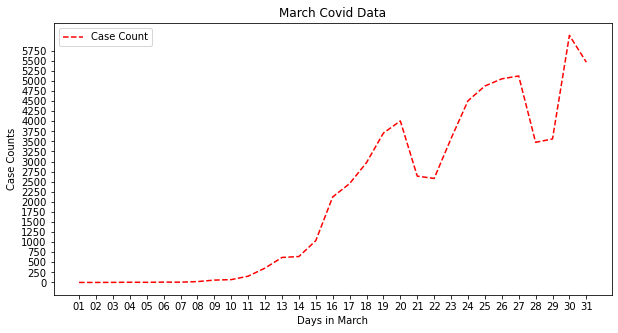

In [232]:
labels = march_covid_data["Day"]
case_count = march_covid_data["case_count"].astype('int')

plt.figure(figsize=(10,5))
plt.plot(labels,case_count, "r--", label="Case Count")

plt.yticks(np.arange(0,6000,250),np.arange(0,6000,250))

plt.title("March Covid Data")
plt.xlabel("Days in March")
plt.ylabel("Case Counts")
plt.legend()

plt.show()

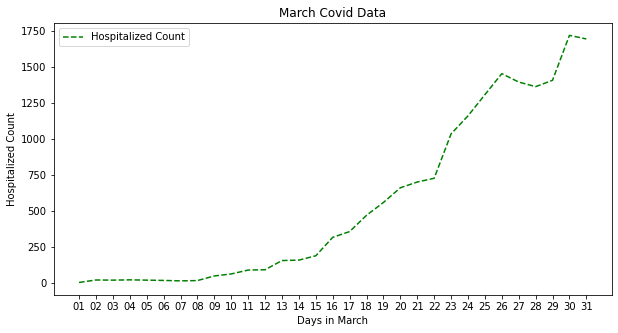

In [233]:
hospitalized_count = march_covid_data["hospitalized_count"].astype('int')


plt.figure(figsize=(10,5))
plt.plot(labels,hospitalized_count, "g--", label="Hospitalized Count")

plt.title("March Covid Data")
plt.xlabel("Days in March")
plt.ylabel("Hospitalized Count")
plt.legend()
plt.show()

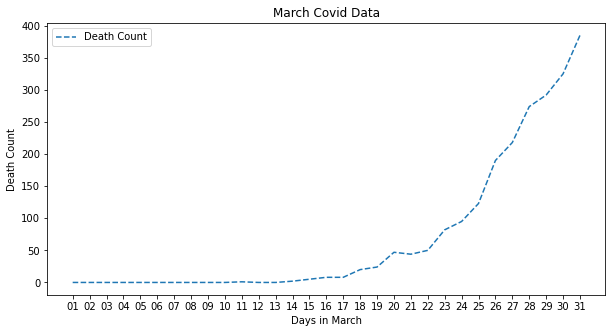

In [234]:
death_count = march_covid_data["death_count"].astype('int')


plt.figure(figsize=(10,5))
plt.plot(labels,death_count, "--", label="Death Count")

plt.title("March Covid Data")
plt.xlabel("Days in March")
plt.ylabel("Death Count")
plt.legend()
plt.xlim()
plt.ylim()
plt.show()

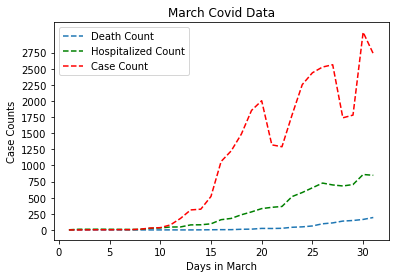

In [235]:

labels = march_covid_data["Day"].astype('int')

case_count = march_covid_data["case_count"].astype('int')
hospitalized_count = march_covid_data["hospitalized_count"].astype('int')
death_count = march_covid_data["death_count"].astype('int')



plt.plot(labels,death_count, "--", label="Death Count")
plt.plot(labels,hospitalized_count, "g--", label="Hospitalized Count")
plt.plot(labels,case_count, "r--", label="Case Count")

plt.yticks(np.arange(0,6000,500),np.arange(0,6000,250))

plt.title("March Covid Data")
plt.xlabel("Days in March")
plt.ylabel("Case Counts")
plt.legend()

plt.show()

In [236]:
data = "resources/NYPD_Arrest_Data__Year_to_Date_.csv"
nypd_data = pd.read_csv(data)
nypd_data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,214353678,06/18/2020,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,68,0,18-24,F,WHITE HISPANIC,978016,172087,40.639022,-74.022464,POINT (-74.02246352399999 40.63902167200007)
1,210517846,03/04/2020,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,M,10,0,25-44,M,BLACK HISPANIC,984331,209268,40.741077,-73.999709,POINT (-73.99970914499994 40.74107715900004)
2,209190141,02/07/2020,569.0,"MARIJUANA, SALE 4 & 5",235.0,DANGEROUS DRUGS,PL 2214000,M,K,70,0,25-44,M,WHITE,996733,162284,40.612108,-73.955041,POINT (-73.95504136299996 40.61210789100005)
3,208085722,01/17/2020,639.0,AGGRAVATED HARASSMENT 2,361.0,OFF. AGNST PUB ORD SENSBLTY &,PL 2403002,M,Q,101,0,45-64,M,BLACK HISPANIC,1053650,158969,40.602746,-73.750078,POINT (-73.75007786499998 40.60274595100003)
4,214476276,06/23/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,48,0,25-44,M,WHITE HISPANIC,1011779,246746,40.843901,-73.900505,POINT (-73.90050463199998 40.84390125500005)


In [242]:
nypd_data[['Mounth','Day',"Year"]] = nypd_data["ARREST_DATE"].str.split("/",expand=True) 
nypd_data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Year,Mounth,Day
0,214353678,06/18/2020,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,68,...,F,WHITE HISPANIC,978016,172087,40.639022,-74.022464,POINT (-74.02246352399999 40.63902167200007),2020,06,18
1,210517846,03/04/2020,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,M,10,...,M,BLACK HISPANIC,984331,209268,40.741077,-73.999709,POINT (-73.99970914499994 40.74107715900004),2020,03,04
2,209190141,02/07/2020,569.0,"MARIJUANA, SALE 4 & 5",235.0,DANGEROUS DRUGS,PL 2214000,M,K,70,...,M,WHITE,996733,162284,40.612108,-73.955041,POINT (-73.95504136299996 40.61210789100005),2020,02,07
3,208085722,01/17/2020,639.0,AGGRAVATED HARASSMENT 2,361.0,OFF. AGNST PUB ORD SENSBLTY &,PL 2403002,M,Q,101,...,M,BLACK HISPANIC,1053650,158969,40.602746,-73.750078,POINT (-73.75007786499998 40.60274595100003),2020,01,17
4,214476276,06/23/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,48,...,M,WHITE HISPANIC,1011779,246746,40.843901,-73.900505,POINT (-73.90050463199998 40.84390125500005),2020,06,23


In [243]:
clean_nypd_data = nypd_data[['OFNS_DESC','PERP_SEX','Mounth','Day',"Year"]]
clean_nypd_data.head()

,OFNS_DESC,PERP_SEX,Mounth,Day,Year
0,FELONY ASSAULT,F,06,18,2020
1,OTHER TRAFFIC INFRACTION,M,03,04,2020
2,DANGEROUS DRUGS,M,02,07,2020
3,OFF. AGNST PUB ORD SENSBLTY &,M,01,17,2020
4,FELONY ASSAULT,M,06,23,2020
...,...,...,...,...,...
74779,VEHICLE AND TRAFFIC LAWS,M,03,19,2020
74780,DANGEROUS DRUGS,M,03,02,2020
74781,GRAND LARCENY,M,02,19,2020
74782,MISCELLANEOUS PENAL LAW,M,03,06,2020


In [252]:
march_nypd_data = clean_nypd_data.loc[(clean_nypd_data["Mounth"] == "03"),:]
march_nypd_data

,OFNS_DESC,PERP_SEX,Mounth,Day,Year
1,OTHER TRAFFIC INFRACTION,M,03,04,2020
7,PETIT LARCENY,M,03,10,2020
12,VEHICLE AND TRAFFIC LAWS,M,03,09,2020
13,MISCELLANEOUS PENAL LAW,M,03,01,2020
14,ASSAULT 3 & RELATED OFFENSES,M,03,15,2020
...,...,...,...,...,...
74750,DANGEROUS WEAPONS,M,03,13,2020
74753,DANGEROUS WEAPONS,M,03,08,2020
74779,VEHICLE AND TRAFFIC LAWS,M,03,19,2020
74780,DANGEROUS DRUGS,M,03,02,2020


In [255]:

group_ofns = march_nypd_data.groupby("Day")
count_ofns = group_ofns["OFNS_DESC"].count()
count_ofns

Day
01    407
02    531
03    619
04    771
05    702
06    550
07    498
08    400
09    423
10    746
11    719
12    671
13    601
14    491
15    392
16    328
17    367
18    482
19    414
20    364
21    327
22    223
23    185
24    288
25    327
26    272
27    290
28    198
29    152
30    204
31    231
Name: OFNS_DESC, dtype: int64

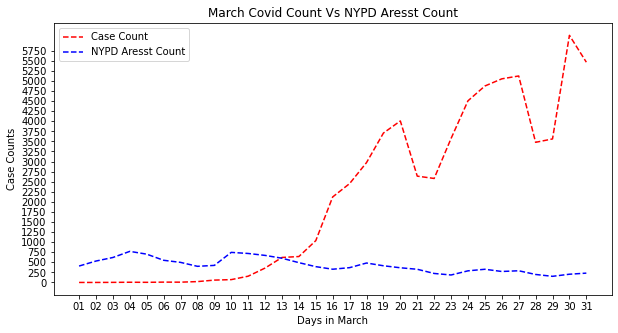

In [259]:
labels = march_covid_data["Day"]
case_count = march_covid_data["case_count"].astype('int')

plt.figure(figsize=(10,5))
plt.plot(labels,case_count, "r--", label="Case Count")
plt.plot(labels,count_ofns,"b--",label="NYPD Arrest Count")
plt.yticks(np.arange(0,6000,250),np.arange(0,6000,250))

plt.title("March Covid Count Vs NYPD Arrest Count")
plt.xlabel("Days in March")
plt.ylabel("Case Counts")
plt.legend()

plt.show()
plt.show()